In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from scipy.stats import zscore
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline

In [2]:
# read again 
clean_df = pd.read_csv('csvDataFile/cleanData.csv')

clean_df.shape

(657, 13)

In [3]:
# drop target columns
x = clean_df.drop(columns=['A16']) 
y = clean_df['A16']

In [4]:
x.head()

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15
0,52.50,7.000,1.0,0.0,0.0,3.000,0.0,0.0,0,0.0,0.0,0
1,19.50,9.585,1.0,0.0,0.0,0.790,0.0,0.0,0,0.0,80.0,350
2,36.50,4.250,1.0,0.0,10.0,3.500,0.0,0.0,0,0.0,454.0,50
3,15.75,0.375,1.0,0.0,1.0,1.000,0.0,0.0,0,0.0,120.0,18
4,36.33,3.790,1.0,0.0,12.0,1.165,1.0,0.0,0,0.0,200.0,0


In [5]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: A16, dtype: float64

In [6]:
x = x.values

x

array([[ 52.5  ,   7.   ,   1.   , ...,   0.   ,   0.   ,   0.   ],
       [ 19.5  ,   9.585,   1.   , ...,   0.   ,  80.   , 350.   ],
       [ 36.5  ,   4.25 ,   1.   , ...,   0.   , 454.   ,  50.   ],
       ...,
       [ 27.67 ,   0.75 ,   1.   , ...,   0.   , 220.   , 251.   ],
       [ 33.67 ,   2.165,   1.   , ...,   1.   , 120.   ,   0.   ],
       [ 23.08 ,   0.   ,   1.   , ...,   2.   ,   0.   ,   0.   ]])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.20, random_state=0)
# training using x_train and y_train

In [8]:
print(f"Size of x_train > {len(x_train)}")
print(f"Size of x_test > {len(x_test)}")

Size of x_train > 525
Size of x_test > 132


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))

rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.transform(x_test)

print(rescaledX_train)

[[1.19641256e-01 4.93181818e-02 5.00000000e-01 ... 0.00000000e+00
  1.50000000e-01 7.00000000e-05]
 [2.52556054e-01 7.00000000e-02 5.00000000e-01 ... 0.00000000e+00
  1.38888889e-01 3.00000000e-05]
 [4.97757848e-01 7.00000000e-02 5.00000000e-01 ... 0.00000000e+00
  3.00000000e-01 0.00000000e+00]
 ...
 [1.65919283e-01 3.40909091e-02 5.00000000e-01 ... 1.00000000e+00
  4.44444444e-01 0.00000000e+00]
 [2.64573991e-01 4.54545455e-02 5.00000000e-01 ... 0.00000000e+00
  2.31944444e-01 5.00000000e-03]
 [1.31479821e-01 4.58409091e-01 1.00000000e+00 ... 0.00000000e+00
  3.61111111e-01 0.00000000e+00]]


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
import joblib

In [11]:
# create instance 
model = LogisticRegression()

# fit set into model - train
model.fit(rescaledX_train, y_train)

LogisticRegression()

In [12]:
# use test set and get the predicted result as return 
yPredTrain = model.predict(rescaledX_train)
yPredTest = model.predict(rescaledX_test)

#### Check accuracy ( Score, RMSE, Confusion Matrix )

In [13]:
# display the RMSE and accuracy for both test and train 
print(f"Acurracy of Train Data > {accuracy_score(y_train, yPredTrain)}")
print(f"RMSE for Train Data    > {np.sqrt(mean_squared_error(y_train, yPredTrain))}")
print("\n")
print(f"Acurracy of Test Data  > {accuracy_score(y_test, yPredTest)}")
print(f"RMSE for Test Data     > {np.sqrt(mean_squared_error(y_test, yPredTest))}")

Acurracy of Train Data > 0.8666666666666667
RMSE for Train Data    > 0.3651483716701107


Acurracy of Test Data  > 0.8712121212121212
RMSE for Test Data     > 0.3588702812826367


In [14]:
model.classes_
# ['+', '-']

array([0., 1.])

<Figure size 640x480 with 0 Axes>

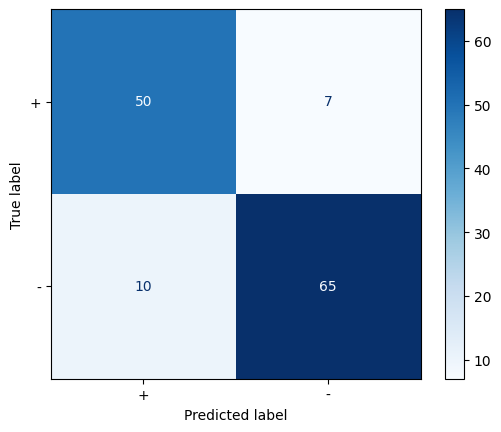

In [15]:
# show confusion matrix 
# get confusion matrix
confusionMatrix = confusion_matrix(y_test, yPredTest)

plt.figure()
diagram = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=['+', '-'])
diagram.plot(cmap=plt.cm.Blues)
plt.show()

In [32]:
print(classification_report(y_test, yPredTest))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        57
         1.0       0.90      0.87      0.88        75

    accuracy                           0.87       132
   macro avg       0.87      0.87      0.87       132
weighted avg       0.87      0.87      0.87       132



## GridSearchCV

**[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**

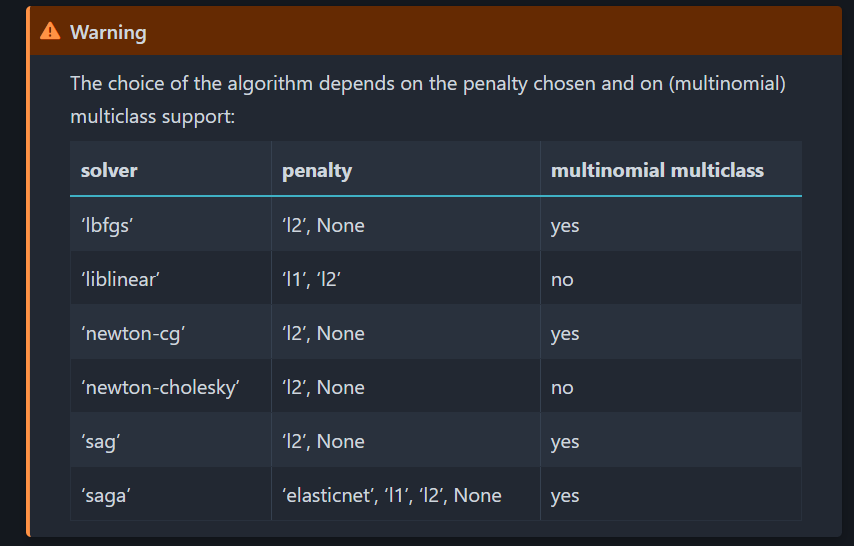

In [16]:
# define the parameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Different values for the regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Different types of penalties
    'solver': ['saga', 'newton-cg', 'liblinear', 'sag', 'lbfgs'],  # Use 'saga' as it's one of the solvers that supports l1 and elasticnet
    'max_iter': [100, 150, 200, 500, 1000],  # Different values for maximum iterations
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'tol' : [0.01, 0.001, 0.0001]
}

# liblinear suitable for small but sag and saga is suitable for largest and more faster 
# but for liblinear is not suitable for multiclass problem, only have newton-cg, lbfgs(default), sag and saga suitable for this case 

In [19]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), verbose=1, n_jobs=-1)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# cv = 5 > 5-fold cross-validation
# verbose = 1 > show progress
# n_jobs = -1 > use all available cores

In [20]:
# fit in the data to find best comparision
grid_model_result = grid_search.fit(rescaledX_train, y_train)

Fitting 5 folds for each of 12000 candidates, totalling 60000 fits


C:\Users\LENOVO\anaconda3\envs\creditApproval\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
36000 fits failed out of a total of 60000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\envs\creditApproval\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\envs\creditApproval\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\envs\creditApp

In [22]:
# display the best parameter
print(f"Best C        > {grid_model_result.best_estimator_.C}")
print(f"Best penalty  > {grid_model_result.best_estimator_.penalty}")
print(f"Best solver   > {grid_model_result.best_estimator_.solver}")
print(f"Best max_iter > {grid_model_result.best_estimator_.max_iter}")
print(f"Best max_iter > {grid_model_result.best_estimator_.l1_ratio}")
print(f"Best max_iter > {grid_model_result.best_estimator_.tol}")

print(f"The best score get from grid > {grid_model_result.best_score_}")

Best C        > 1000
Best penalty  > l2
Best solver   > lbfgs
Best max_iter > 100
Best max_iter > 0
Best max_iter > 0.0001
The best score get from grid > 0.8647619047619047


In [28]:
# show testing performance 
yGridPredTrain = grid_model_result.predict(rescaledX_train)
yGridPredTest = grid_model_result.predict(rescaledX_test)

In [29]:
# display the RMSE and accuracy for both test and train 
print(f"Acurracy of Train Data after Grid > {accuracy_score(y_train, yGridPredTrain)}")
print(f"RMSE for Train Data after Grid    > {np.sqrt(mean_squared_error(y_train, yPredTrain))}")
print("\n")
print(f"Acurracy of Test Data after Grid  > {accuracy_score(y_test, yGridPredTest)}")
print(f"RMSE for Test Data after Grid     > {np.sqrt(mean_squared_error(y_test, yGridPredTest))}")

Acurracy of Train Data after Grid > 0.8742857142857143
RMSE for Train Data after Grid    > 0.3651483716701107


Acurracy of Test Data after Grid  > 0.8712121212121212
RMSE for Test Data after Grid     > 0.3588702812826367


<Figure size 640x480 with 0 Axes>

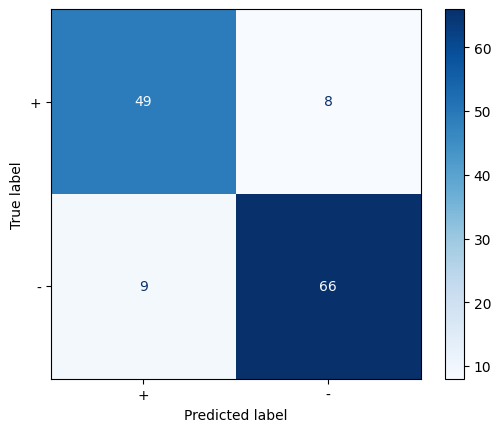

In [25]:
# show confusion matrix 
# get confusion matrix
confusionMatrix = confusion_matrix(y_test, yGridPredTest)

plt.figure()
diagram = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=['+', '-'])
diagram.plot(cmap=plt.cm.Blues)
plt.show()

In [30]:
print(classification_report(y_test, yGridPredTest))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85        57
         1.0       0.89      0.88      0.89        75

    accuracy                           0.87       132
   macro avg       0.87      0.87      0.87       132
weighted avg       0.87      0.87      0.87       132



### Export For Further Use

In [33]:
joblib.dump(grid_model_result, 'model/LogisticRegression.pkl')

['model/LogisticRegression.pkl']